In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# Take in all of our city & ride data and read it into pandas
city = ".\\raw_data\city_data.csv"
ride = "./raw_data/ride_data.csv"


city_df= pd.read_csv(city)
ride_df= pd.read_csv(ride)



In [3]:

city_df.head()


,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [4]:
ride_df.head()


,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [5]:
combined_df = pd.merge(ride_df, city_df, on='city')
combined_df.head()

,city,date,fare,ride_id,driver_count,type
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038,46,Urban
1,Sarabury,2016-07-23 07:42:44,21.76,7546681945283,46,Urban
2,Sarabury,2016-04-02 04:32:25,38.03,4932495851866,46,Urban
3,Sarabury,2016-06-23 05:03:41,26.82,6711035373406,46,Urban
4,Sarabury,2016-09-30 12:48:34,30.30,6388737278232,46,Urban


In [6]:
ride_groupby = ride_df.groupby('city')
ride_per_city = ride_groupby.count()['fare']
avg_per_city = ride_groupby.mean()['fare']
fare_sum_city = ride_groupby.sum()['fare']

In [7]:
city_df.set_index('city' , inplace= True)
city_df['avg_fare'] = avg_per_city
city_df['ride_count'] = ride_per_city
city_df['total_fare'] = fare_sum_city
city_df.head()

,driver_count,type,avg_fare,ride_count,total_fare
city,,,,,
Kelseyland,63,Urban,21.806429,28,610.58
Nguyenbury,8,Urban,25.899615,26,673.39
East Douglas,12,Urban,26.169091,22,575.72
West Dawnfurt,34,Urban,22.330345,29,647.58
Rodriguezburgh,52,Urban,21.332609,23,490.65


In [8]:
urban = city_df.loc[city_df['type']=='Urban',:]
suburban = city_df.loc[city_df['type']=='Suburban',:]
rural = city_df.loc[city_df['type']=='Rural',:]


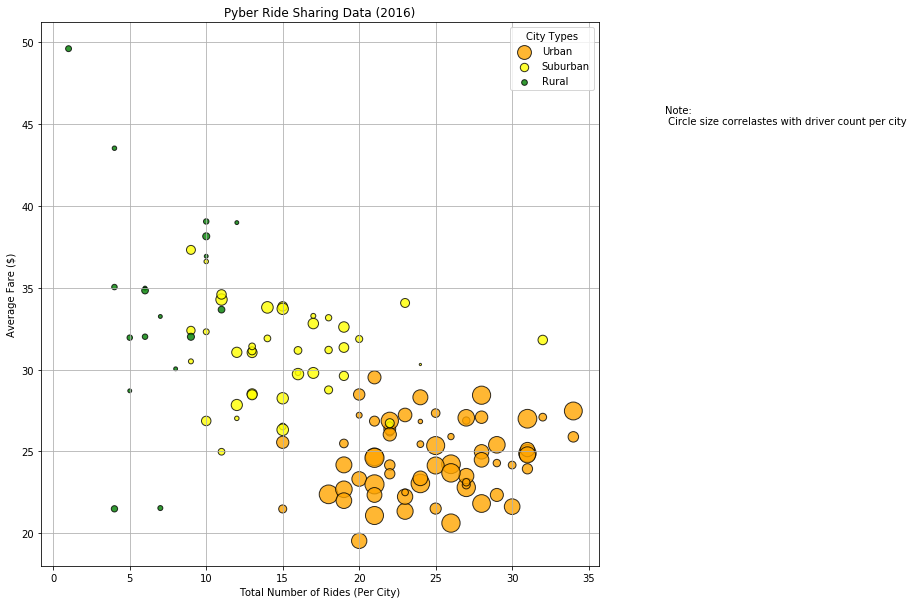

In [12]:
import seaborn as sns
# use the scatter function
plt.figure(figsize=(10,10))
urban_plot = plt.scatter(x = urban['ride_count'], y = urban['avg_fare'], s = urban['driver_count'] * 5, alpha = 0.8,
                        edgecolors = 'black', color = 'orange', label = 'Urban')
suburban_plot = plt.scatter(x = suburban['ride_count'], y = suburban['avg_fare'], s = suburban['driver_count'] * 5, alpha = 0.8,
                        edgecolors = 'black', color = 'yellow', label = 'Suburban')
rural_plot = plt.scatter(x = rural['ride_count'], y = rural['avg_fare'], s = rural['driver_count'] * 5, alpha = 0.8,
                        edgecolors = 'black', color = 'green', label = 'Rural')
plt.grid()
plt.legend(fontsize='medium', mode='Expanded' , numpoints=1, scatterpoints=1, loc="best", title='City Types', labelspacing=0.5)

plt.title("Pyber Ride Sharing Data (2016)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.text(40, 45, "Note: \n Circle size correlastes with driver count per city")
 

plt.show()


In [13]:
# Pie chart


In [14]:
#1. % Total fares by city type
type_fare_df = city_df.reset_index()
type_fare_df = type_fare_df.groupby('type').sum()
type_fare_df





,driver_count,avg_fare,ride_count,total_fare
type,,,,
Rural,104,615.728572,125,4255.09
Suburban,638,1268.627391,625,19317.88
Urban,2607,1623.863390,1625,40078.34


In [15]:
type_fare_df['percent_fare'] = 100 * (type_fare_df['total_fare']/type_fare_df.total_fare.sum())

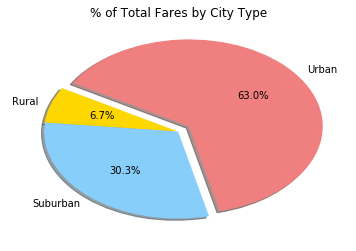

In [16]:
# pie chart
# Labels for the sections of our pie chart
labels = ["Rural", "Suburban", "Urban"]
# The colors of each section of the pie chart
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0,0,0.1)
plt.pie(type_fare_df['percent_fare'], labels=labels, explode=explode, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")
plt.show()


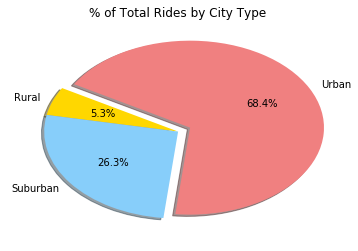

In [17]:
#2. % Total rides by city type
type_fare_df['percent_ride'] = 100 * (type_fare_df['ride_count']/type_fare_df.ride_count.sum())
# pie chart
# Labels for the sections of our pie chart
labels = ["Rural", "Suburban", "Urban"]
# The colors of each section of the pie chart
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0,0,0.1)
plt.pie(type_fare_df['percent_ride'], labels=labels, explode=explode, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("% of Total Rides by City Type")
plt.show()


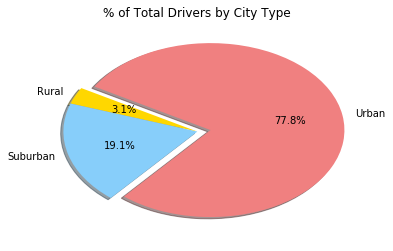

In [18]:
#2. % Total drivers by city type
type_fare_df['percent_driver'] = 100 * (type_fare_df['driver_count']/type_fare_df.driver_count.sum())
# pie chart
# Labels for the sections of our pie chart
labels = ["Rural", "Suburban", "Urban"]
# The colors of each section of the pie chart
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0,0,0.1)
plt.pie(type_fare_df['percent_driver'], labels=labels, explode=explode, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("% of Total Drivers by City Type")
plt.show()

In [ ]:
# Three observable trends:
#1.% of Total Fares by City Type is highest for Urban, then Suburban and  lowest for Rural
#2.% of Total Rides by City Type is highest for Urban, then Suburban and  lowest for Rural
#3.% of Total Drivers by City Type is highest for Urban, then Suburban and  lowest for Rural

